## Example of Vector Embeddings using Word2Vec

Note that the gensim library used for Word2Vec requires a numpy version below 2.0, while we have been using more recent versions which is incompatible.  To resolve this, you may need to downgrade numpy to a compatible version.  If you get an error message when you run the code block to pre-process text, you will likely need to restart the Jupyter kernel.  To do this, open the command palette by pressing Cmd+Shift+P (Mac) or Ctrl+Shift+P (Windows) and look for the dropdown that says "Jupyter: Restart Kernel".  This will clear variables and provide a clean slate for this code.

In [1]:
# Downgrade numpy to a compatible version for the gensim library.

# First, completely remove NumPy to ensure there are no conflicting versions installed
!pip uninstall -y numpy
!pip cache purge

# Next, reinstall NumPy to a version earlier than 2.0
!pip install "numpy<2.0"

import numpy as np
print("NumPy version:", np.__version__)
print("NumPy location:", np.__file__)

# Make sure that gensim is using the correct NumPy version
!pip install --force-reinstall gensim "numpy<2.0"

Found existing installation: numpy 2.3.3
Uninstalling numpy-2.3.3:
  Successfully uninstalled numpy-2.3.3
Files removed: 2238 (1371.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 41.0 MB/s  0:00:00 eta 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
NumPy version: 1.26.4
NumPy location: /Users/shugney20/Documents/genai/.venv/lib/python3.12/site-packages/numpy/__init__.py
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 60.2 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.4/30.4 MB 65.9 MB/s  0:00:00 eta 0:00:01
  Attempting uninstall: wrapt
    Found existing installat

Install necessary libraries if you have not already done so.

In [2]:
!pip install pandas
!pip install gensim
!pip install scikit-learn
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 36.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 41.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 55.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


Import necessary libraries.

In [3]:
# Import necessary libraries
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

Create a toy dataset.

In [4]:
# Example dataset
data = {
    "tweet": [
        "I love the new iPhone! It's fantastic. #Apple",
        "The service at this restaurant was terrible. Never going back. #Disappointed",
        "Tesla's new model is groundbreaking! #Innovation",
        "I had an average experience with the product. It's okay. #Neutral",
    ]
}
df = pd.DataFrame(data)

Next, we preprocess our data.  The first step is to tokenize the tweets.  As you look at the code, think about what it is doing.

The next step is to train our Word2Vec model.  Copy this line of code into ChatGPT and ask it to explain the model parameters to you.

Finally we will store the word vectors from the "model" into a new variable called word_vectors.

In [5]:
# Preprocessing: Tokenize tweets
df["tokens"] = df["tweet"].str.lower().str.split()

# Train Word2Vec model
model = Word2Vec(sentences=df["tokens"], vector_size=50, window=5, min_count=1, workers=4)

# Get embeddings for words in the vocabulary
word_vectors = model.wv


The following function is used to visualize the word embeddings using t-SNE.  

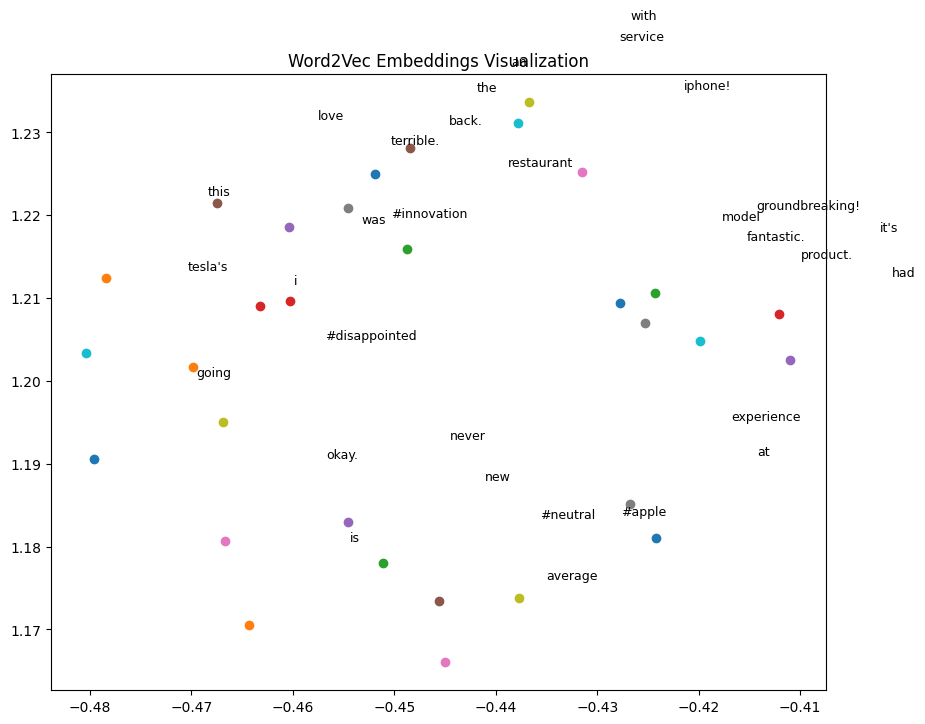

In [6]:
# Visualize embeddings using t-SNE
def plot_word_embeddings(word_vectors):
    words = list(word_vectors.key_to_index.keys())
    vectors = word_vectors[words]
    
    # Reduce dimensions for visualization
    tsne = TSNE(n_components=2, random_state=42)
    reduced_vectors = tsne.fit_transform(vectors)
    
    # Plot the embeddings
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
        plt.text(reduced_vectors[i, 0] + 0.01, reduced_vectors[i, 1] + 0.01, word, fontsize=9)
    plt.title("Word2Vec Embeddings Visualization")
    plt.show()

plot_word_embeddings(word_vectors)